### 1.0 BUSINESS UNDERSTANDING

#### 1.1 Background

SyriaTel is one of the leading telecommunication companies in Syria. 
It provides a wide range of telecommunications services, including mobile and fixed-line telephony, internet services and data services.

Syriatel has been a key player in the Syrian telecommunications market, serving millions of customers across the country. The company has played a significant role in expanding and modernizing telecommunications infrastructure, contributing to the country's connectivity and economic development. 


The telecommunications company is interested in reducing how much money is lost because of customers who don't stick around very long.

#### 1.2 Problem Statement

In this competitive world, business is becoming highly saturated. Especially, the field of telecommunication faces complex challenges
due to a number of vibrant competitive service providers. Therefore, it has become very difficult for them to retain existing customers. Since the cost of
acquiring new customers is much higher than the cost of retaining the existing customers, it is the time for the telecom
industries to take necessary steps to retain the customers to
stabilize their market value.

#### 1.3 Objectives
1. To calculate the churn rate at SyriaTel, a telecommunications company.
2. To identify the factors that lead to churn and those that help in customer retention.
3. To identify the relationship between the predictor variables and churn and find if there are predictable patterns.



### 2.0 DATA UNDERSTANDING


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:

df=pd.read_csv(r"C:\Users\user\Desktop\Phase_3_project\customer_churn_dataset.csv")
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Better view of the dataframe since it has many columns
# Transposing does not transform or modify the original df. It only 
# enhances the visibility of the many columns

df.head().T

,0,1,2,3,4
state,KS,OH,NJ,OH,OK
account length,128,107,137,84,75
area code,415,415,415,408,415
phone number,382-4657,371-7191,358-1921,375-9999,330-6626
international plan,no,no,no,yes,yes
voice mail plan,yes,yes,no,no,no
number vmail messages,25,26,0,0,0
total day minutes,265.1,161.6,243.4,299.4,166.7
total day calls,110,123,114,71,113
total day charge,45.07,27.47,41.38,50.9,28.34


In [4]:
# number of rows and columns in the dataframe
# Each row represents a record of a customer

print("The number of rows in the SyriaTel dataframe is", df.shape[0])
print("The number of columns in the SyriaTel dataframe is", df.shape[1])

The number of rows in the SyriaTel dataframe is 3333
The number of columns in the SyriaTel dataframe is 21


In [5]:
# Getting column information such as the Datatype and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#  Getting the names of the columns

df.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
# getting the descriptive statistics of the dataframe

df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


##### Observations

The minimum number of voicemail messages, total day minutes, total day calls, total day charge, total evening minutes, total evening calls and total evening charge are all 0.



In [8]:
# Understanding the current Churn Status

df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

It is evident that there are 483 disloyal customers who have churned the services of SyriaTel

### 3.0 DATA PREPARATION.

#### 3.1 Data Cleaning


In [9]:
# checking for duplicates

df.duplicated().value_counts()

False    3333
dtype: int64

Observation: There are no duplicates in the 3333 records.

In [10]:
# Checking for missing values

df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Observation: No column has a missing value

In [11]:
# Checking the unique values of the states 

df.state.unique()


array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [12]:
# checking for the number of unique values in state

no_of_unique=df.state.nunique()

print("Observation: There are {} unique states represented in this Dataframe.".format(no_of_unique))

Observation: There are 51 unique states represented in this Dataframe.


In [13]:
# Removing phone number as it has no use here

df.drop(columns =["phone number"], inplace = True)


In [14]:
# Confirming that we are now working with 20 columns


print("Number of columns are now",df.columns.value_counts().sum(),"after removing phone number column.")

Number of columns are now 20 after removing phone number column.


#### 3.2 EXPLORATORY DATA ANALYSIS

##### 3.2.1 Univariate Analysis

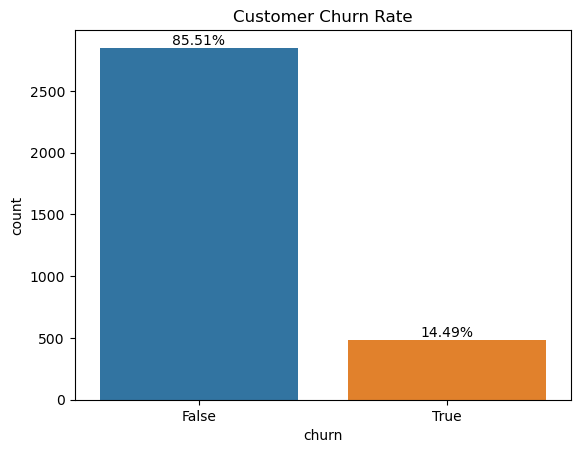

In [56]:
sns.countplot(x="churn", data=df)
plt.title ("Customer Churn Rate")

# Calculating churn percentages
total_count = df.shape[0]  #rows/total num of customers
churn_counts = df["churn"].value_counts()    # value count of each of the two unique values
churn_percentages = churn_counts / total_count * 100

# Annotating the bars with churn percentages
for i, percentage in enumerate(churn_percentages):
    plt.text(i, churn_counts[i], f'{percentage:.2f}%', ha="center", va= "bottom")

plt.show()


Observation: The churn rate currently stands at 14.49% 

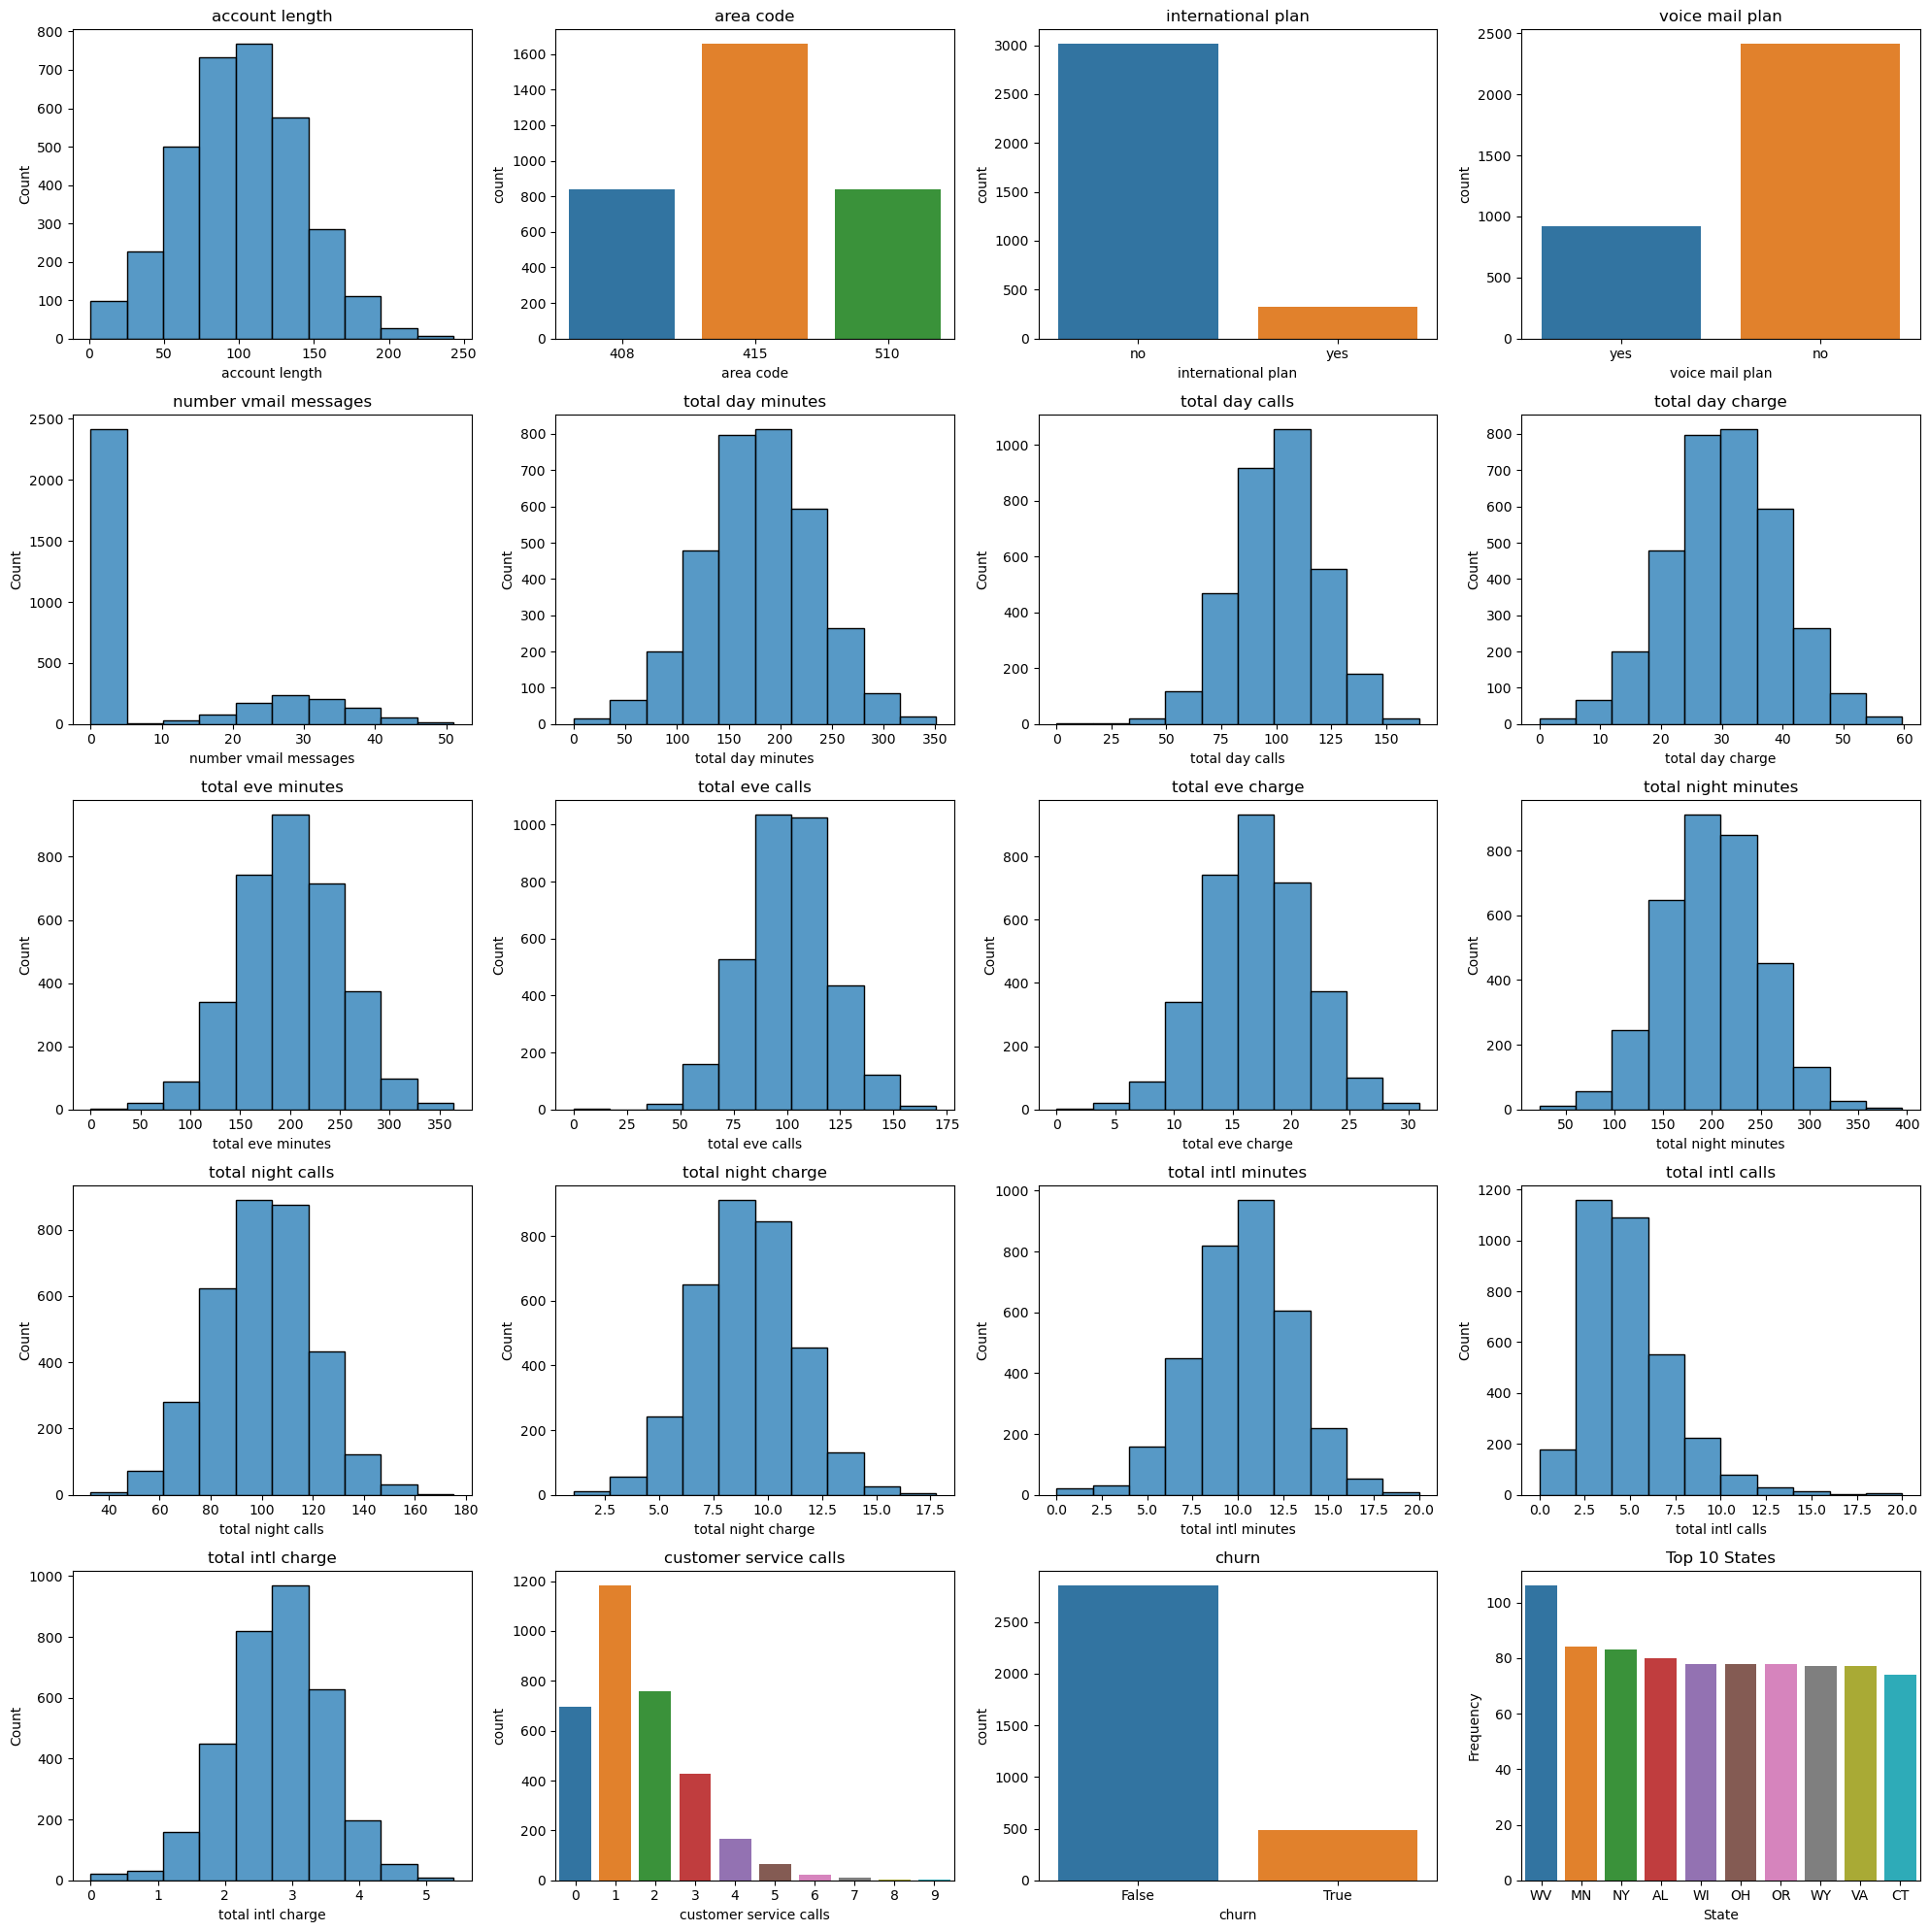

In [101]:
# State column will be plotted separately from the countplot,
# despite being nominal. This will be done due to high number of unique states(51) which cannot fit well in a countplot.

columns_to_plot = [col for col in df.columns if col != "state"]

# Setting up the figure and axes for subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Flattening the axes for easier iteration
axes = axes.flatten()

# Iterating over each column and create countplot(nominal/object) or histogram(discreet)

for i, column in enumerate(columns_to_plot):
    if df[column].dtype == 'object' or df[column].nunique() < 20:
        sns.countplot(x=column, data=df, ax=axes[i])
    else:
        sns.histplot(df[column], bins= 10, kde=False, ax=axes[i])
    axes[i].set_title(column)  # title for each subplot



# now i will plot the top 10 states

state_counts = df['state'].value_counts().head(10)  # Top 10 states
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Top 10 States')
plt.xlabel('State')
plt.ylabel('Frequency')

    
    

# Adjusting layout to prevent overlap
plt.tight_layout()

plt.show()


Visualizing the Outliers

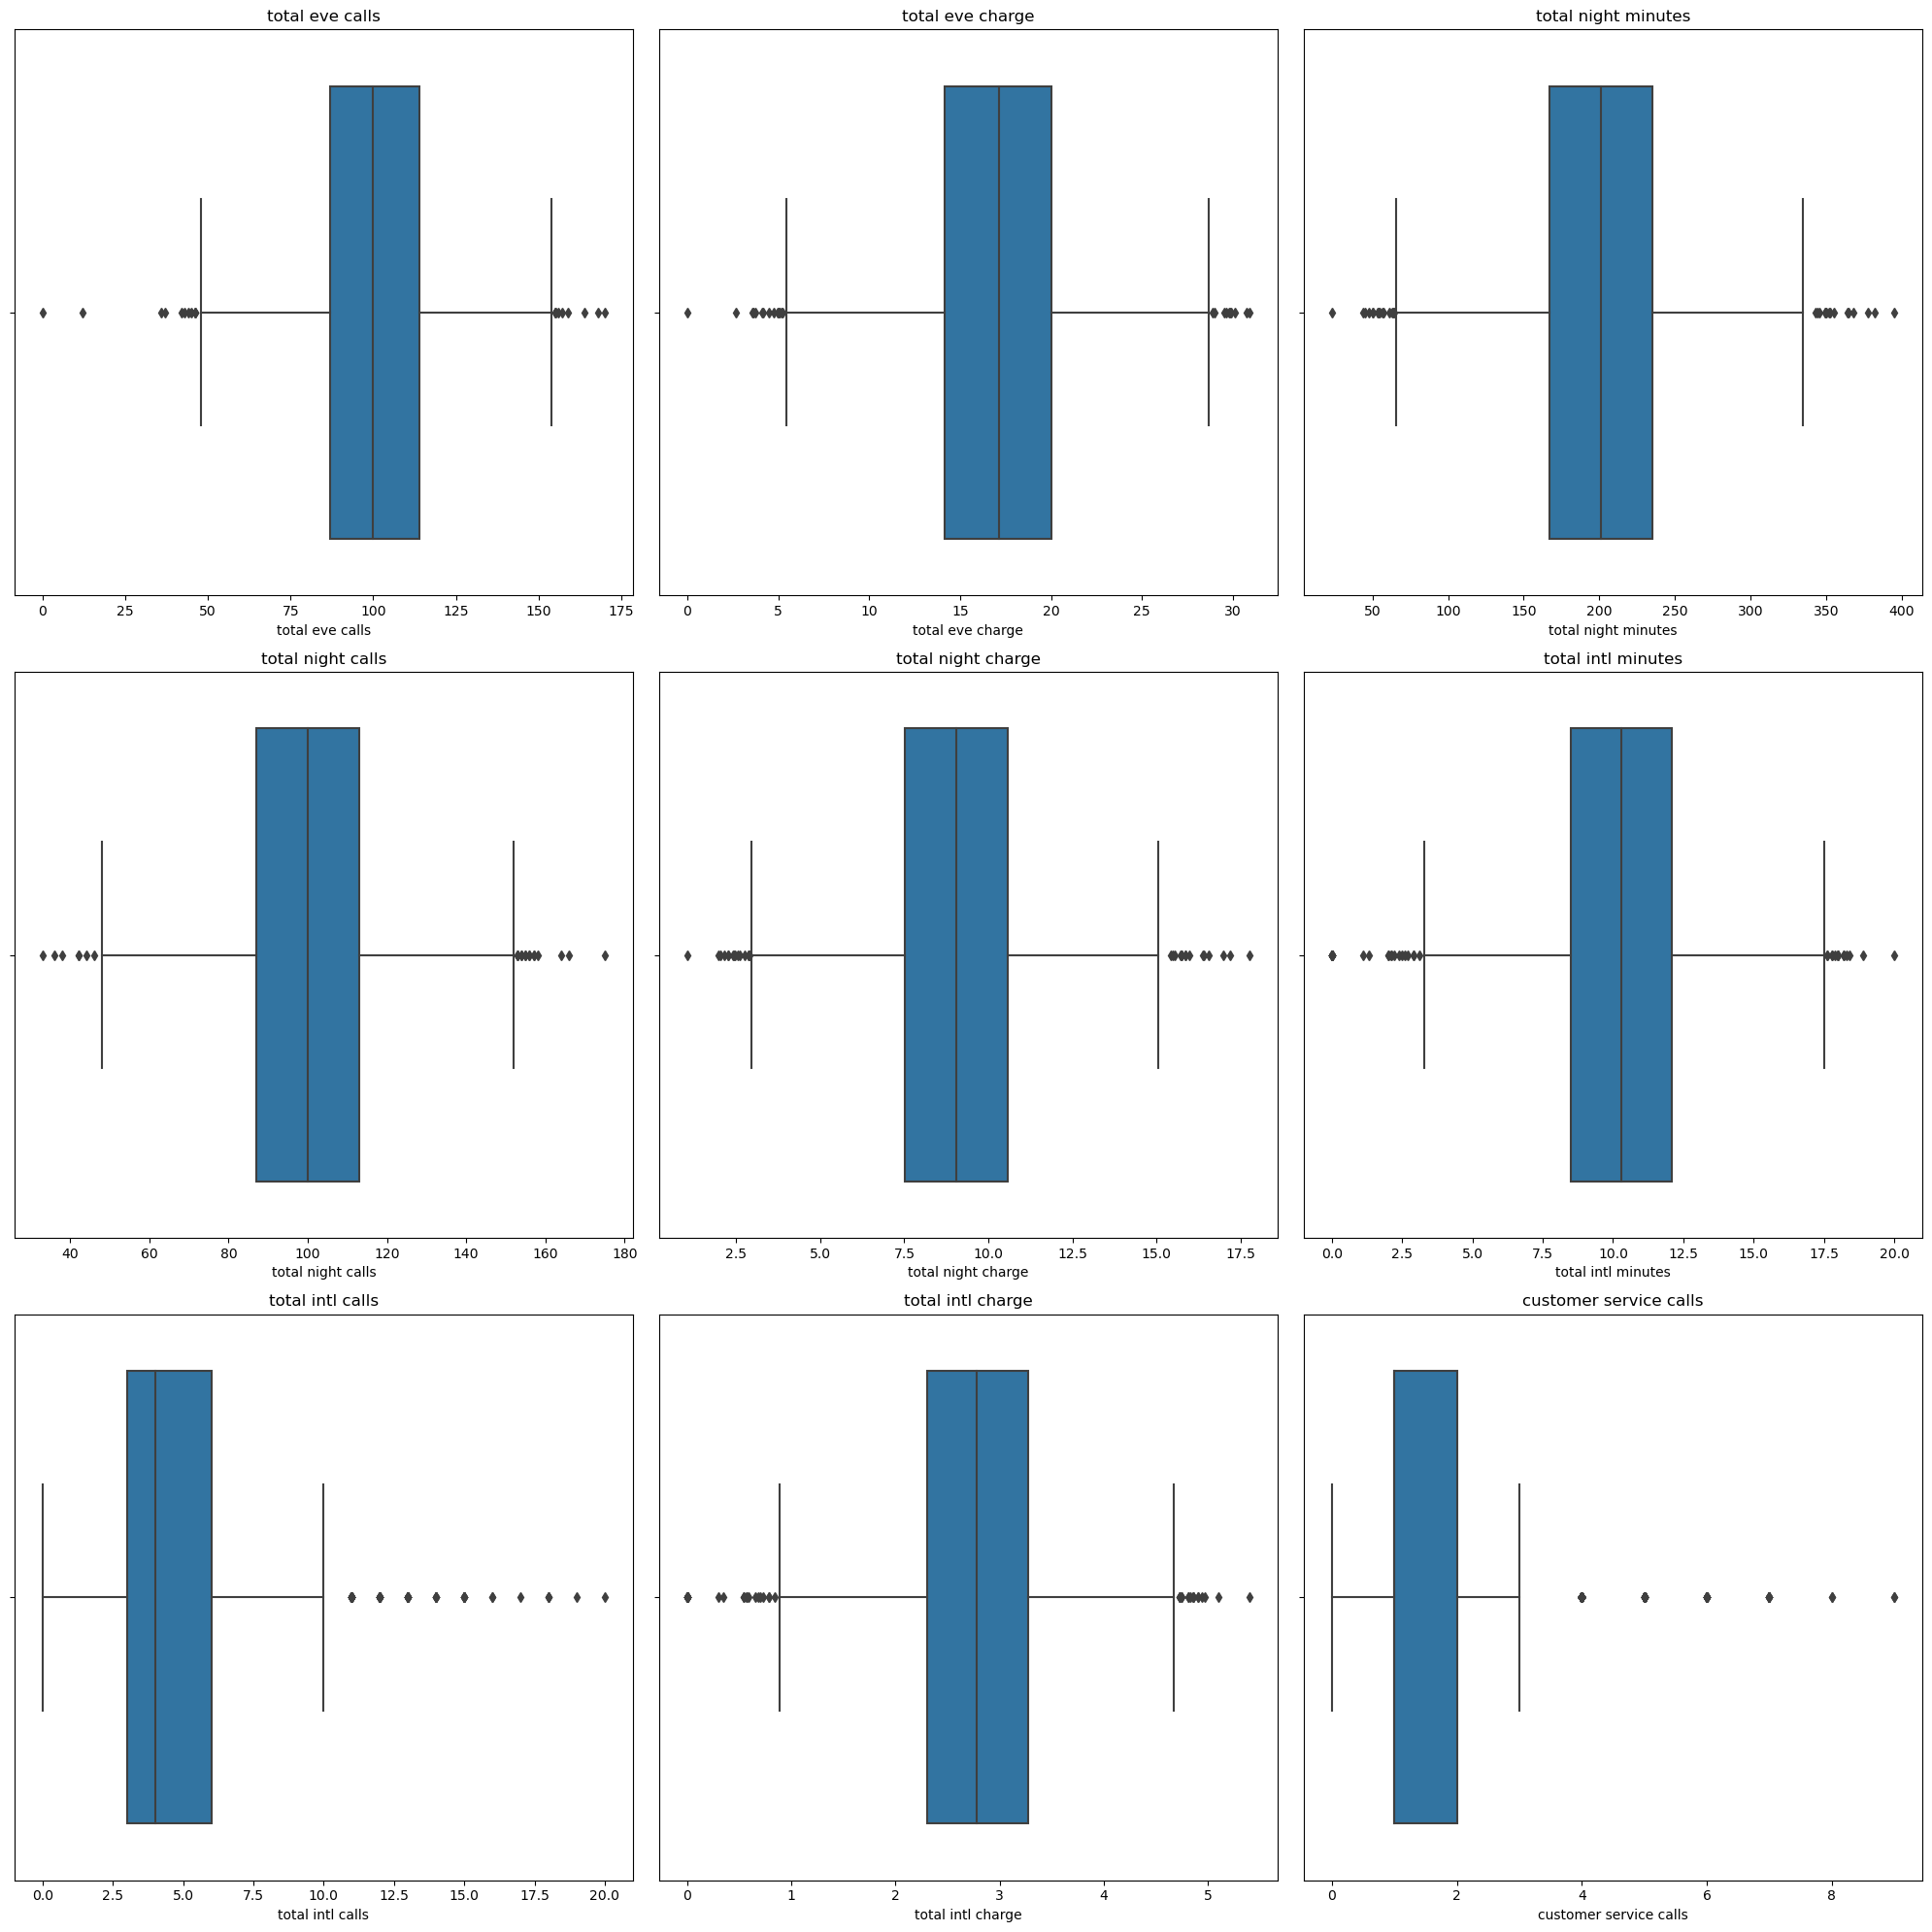

In [98]:

cols_boxplot = df.columns[[10, 11, 12,13, 14,15, 16, 17, 18,]]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

axes = axes.flatten()


for i, column in enumerate(cols_boxplot):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column) 


plt.tight_layout()
plt.show()


##### 3.2.2 Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

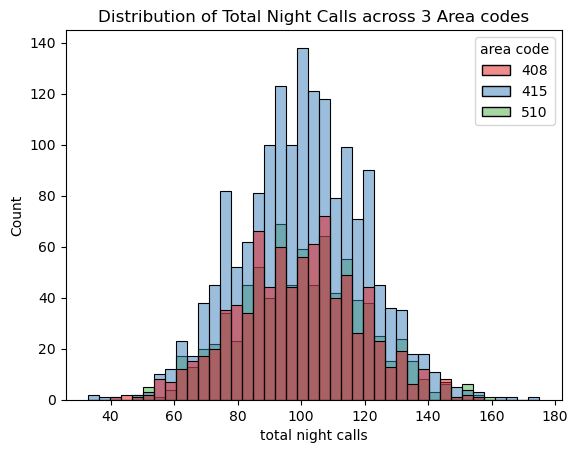

In [97]:
sns.histplot(x="total night calls", kde=False, hue= "area code", data=df, palette="Set1")
plt.title("Distribution of Total Night Calls across 3 Area codes")
plt.show


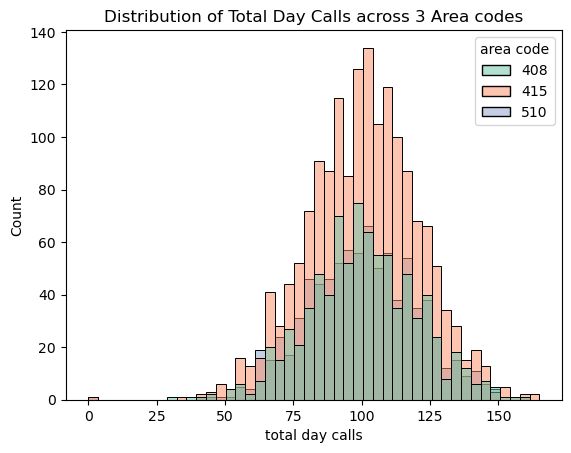

In [95]:
sns.histplot(x="total day calls",kde= False, hue = "area code", data=df, palette ="Set2")
plt.title("Distribution of Total Day Calls across 3 Area codes")
plt.show()

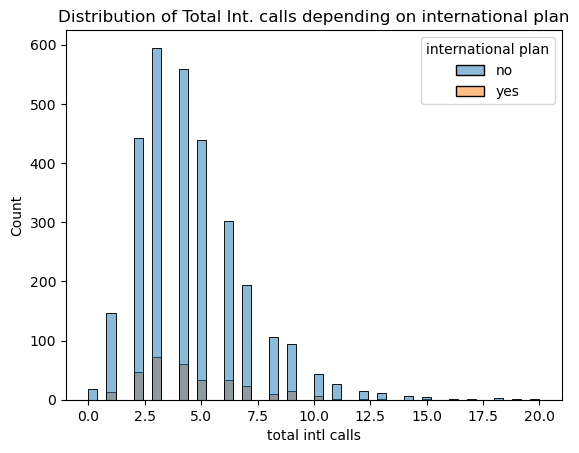

In [102]:
sns.histplot(x="total intl calls", data = df, hue="international plan", kde= False)
plt.title("Distribution of Total Int. calls depending on international plan")
plt.show()

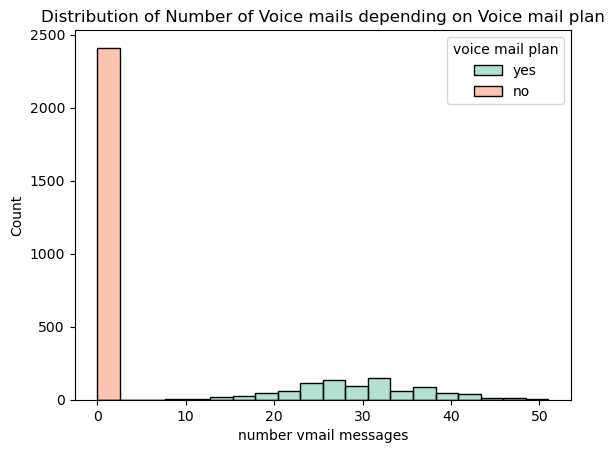

In [103]:
sns.histplot(x="number vmail messages", data = df, hue="voice mail plan", kde= False, palette= "Set2")
plt.title("Distribution of Number of Voice mails depending on Voice mail plan")
plt.show()